In [19]:
import networkx as nx
from nltk.corpus import wordnet as wn

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Auxiliary functions

In [46]:
def loop(graph, start, node, hypo=True):
    """transvers the graph"""
    graph.depth[node.lemma_names()[0]] = node.shortest_path_distance(start)
    if hypo:
        hypo = node.hyponyms()
    else:
        hypo = node.hypernyms()
    if len(hypo) == 0:
        return
    for child in hypo:
        graph.add_edge(node.name, child.name)
        loop(graph, start, child)

In [47]:
def hyp_graph(start_word, hypo=True):
    """
    hyper graph originatng in the starting word (start_word) and adding the different 
    nodes to it
    """
    G = nx.Graph()
    G.depth = {}
    loop(G, start_word, start_word, hypo)
    return G

In [48]:
def visualize_word(word, hypo=True):
    """
    Constructs the graph starting from the first synset that is available
    """
    syn = wn.synsets(word)
    return hyp_graph(syn[0], hypo)

Main Graph

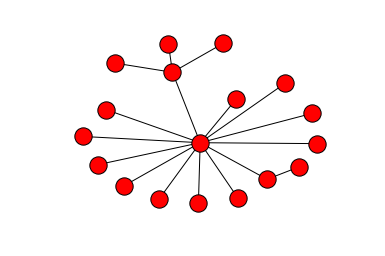

In [49]:

limits=plt.axis('off')
G = visualize_word('stock', True)
nx.draw(G,pos=nx.spring_layout(G))
